<a href="https://colab.research.google.com/github/Devansharma/Time_Series_Analysis/blob/master/Multiple_time_Series_using_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px
from download import download

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [8]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip','/tmp/aq', kind="zip")

Creating data folder...

file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:01<00:00, 6.15MB/s]
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [9]:
!ls -alrt /tmp/aq/PRSA_Data_20130301-20170228

total 31780
drwxr-xr-x 3 root root    4096 Jul 13 16:13 ..
-rw-r--r-- 1 root root 2835916 Jul 13 16:13 PRSA_Data_Aotizhongxin_20130301-20170228.csv
-rw-r--r-- 1 root root 2722295 Jul 13 16:13 PRSA_Data_Changping_20130301-20170228.csv
-rw-r--r-- 1 root root 2675856 Jul 13 16:13 PRSA_Data_Dingling_20130301-20170228.csv
-rw-r--r-- 1 root root 2636684 Jul 13 16:13 PRSA_Data_Dongsi_20130301-20170228.csv
-rw-r--r-- 1 root root 2695860 Jul 13 16:13 PRSA_Data_Guanyuan_20130301-20170228.csv
-rw-r--r-- 1 root root 2654625 Jul 13 16:13 PRSA_Data_Gucheng_20130301-20170228.csv
-rw-r--r-- 1 root root 2641027 Jul 13 16:13 PRSA_Data_Huairou_20130301-20170228.csv
-rw-r--r-- 1 root root 2839705 Jul 13 16:13 PRSA_Data_Nongzhanguan_20130301-20170228.csv
-rw-r--r-- 1 root root 2620654 Jul 13 16:13 PRSA_Data_Shunyi_20130301-20170228.csv
-rw-r--r-- 1 root root 2655061 Jul 13 16:13 PRSA_Data_Tiantan_20130301-20170228.csv
-rw-r--r-- 1 root root 2659544 Jul 13 16:13 PRSA_Data_Wanliu_20130301-20170228.csv
drwxr-

In [10]:
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [20]:
aq_df_sh = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv',
                    parse_dates = [['year', 'month', 'day', 'hour']],
                    date_parser=convert_to_date,
                    keep_date_col=False)

In [21]:
aq_df_wa = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv',
                    parse_dates = [['year', 'month', 'day', 'hour']],
                    date_parser=convert_to_date,
                    keep_date_col=False)

In [22]:
aq_df_gu = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv',
                    parse_dates = [['year', 'month', 'day', 'hour']],
                    date_parser=convert_to_date,
                    keep_date_col=False)

In [23]:
aq_df = pd.concat([aq_df_sh,aq_df_wa,aq_df_gu], ignore_index=True, sort=False)

In [24]:
aq_df.head()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [25]:
aq_df.tail()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
105187,2017-02-28 19:00:00,35060,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
105188,2017-02-28 20:00:00,35061,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
105189,2017-02-28 21:00:00,35062,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
105190,2017-02-28 22:00:00,35063,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng
105191,2017-02-28 23:00:00,35064,12.0,48.0,5.0,48.0,600.0,28.0,6.2,1010.5,-13.4,0.0,NNE,0.7,Gucheng


In [26]:
aq_df = aq_df.drop(['No'], axis=1)

In [31]:
aq_df = aq_df.set_index('year_month_day_hour').groupby('station').resample('D').mean()

In [ ]:
aq_df

In [33]:
aq_df = aq_df.reset_index()

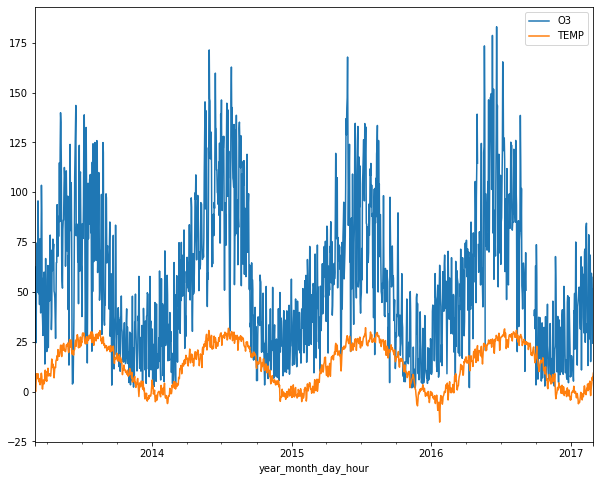

In [39]:
aq_df.set_index('year_month_day_hour').query("station=='Shunyi'")[['O3','TEMP']].plot()

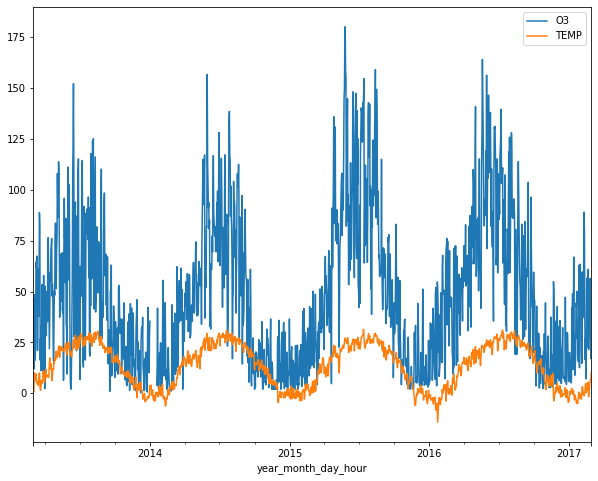

In [40]:
aq_df.set_index('year_month_day_hour').query("station=='Wanliu'")[['O3','TEMP']].plot()

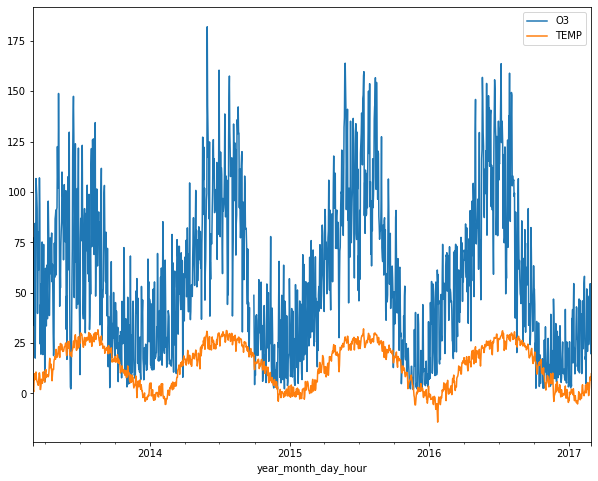

In [41]:
aq_df.set_index('year_month_day_hour').query("station=='Gucheng'")[['O3','TEMP']].plot()

station
Gucheng    AxesSubplot(0.125,0.125;0.775x0.755)
Shunyi     AxesSubplot(0.125,0.125;0.775x0.755)
Wanliu     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

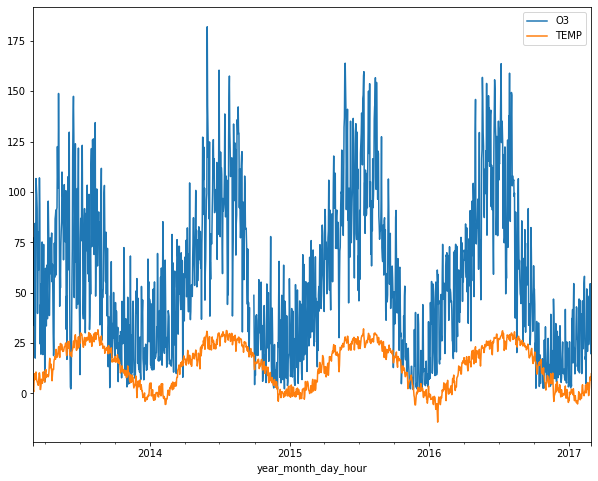

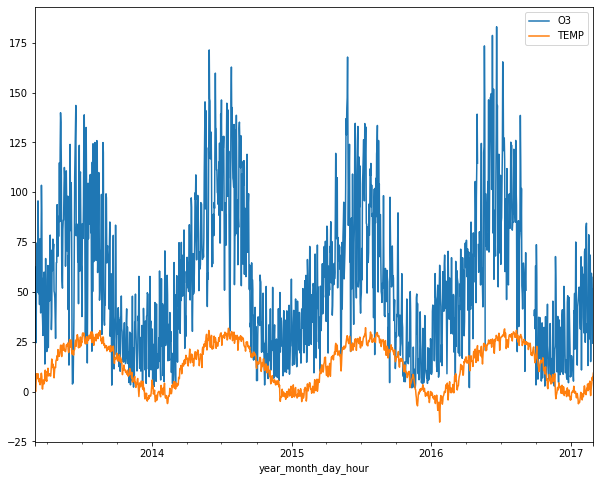

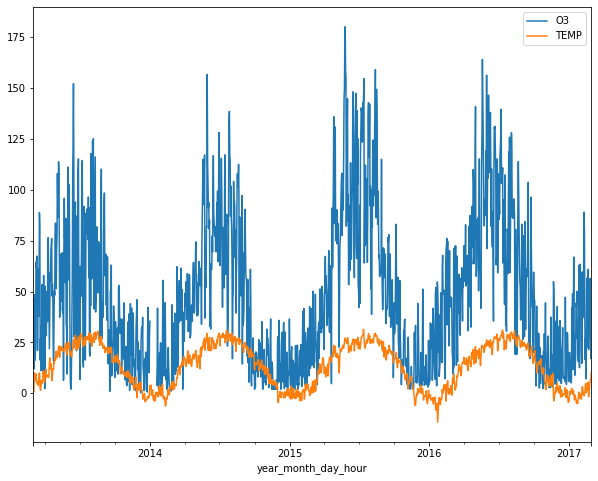

In [42]:
aq_df.set_index('year_month_day_hour').groupby('station')[['O3','TEMP']].plot()

In [43]:
aq_df['station'].unique()

array(['Gucheng', 'Shunyi', 'Wanliu'], dtype=object)

In [44]:
from fbprophet import Prophet

In [45]:
aq_df_final = aq_df[['year_month_day_hour', 'O3', 'TEMP', 'station']].rename({'year_month_day_hour':'ds', 'O3':'y'}, axis='columns')

In [46]:
aq_df_final

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
...,...,...,...,...
4378,2017-02-24,38.583333,4.395833,Wanliu
4379,2017-02-25,56.375000,6.387500,Wanliu
4380,2017-02-26,30.250000,6.720833,Wanliu
4381,2017-02-27,17.136364,7.220833,Wanliu


In [47]:
stations = aq_df_final.groupby('station')

In [48]:
stations.head()

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
1461,2013-03-01,62.478261,0.541667,Shunyi
1462,2013-03-02,40.416667,0.083333,Shunyi
1463,2013-03-03,24.541667,5.029167,Shunyi
1464,2013-03-04,55.125000,8.937500,Shunyi
1465,2013-03-05,74.541667,6.450000,Shunyi


In [51]:
for station in stations.groups:
  group = stations.get_group(station)
  train = group[(group['ds']>='2013-03-01') & (group['ds']<='2016-02-28')]
  test = group[(group['ds']>'2016-02-28')]
  print(test.shape)

(366, 4)
(366, 4)
(366, 4)


In [52]:
target = pd.DataFrame()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


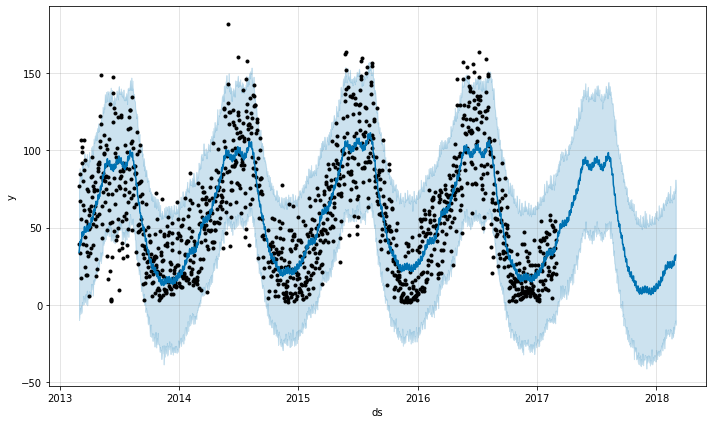

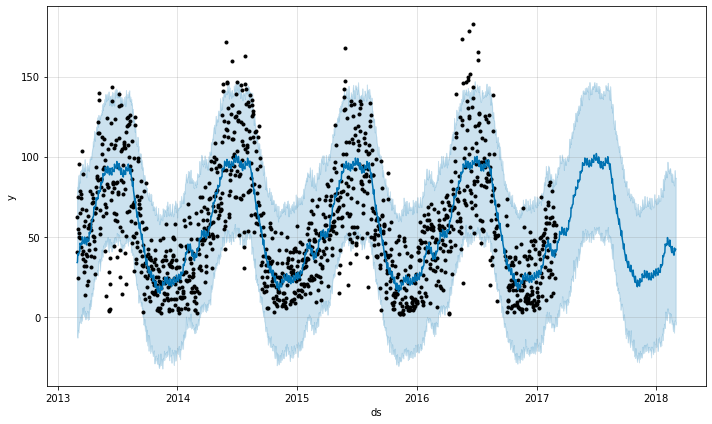

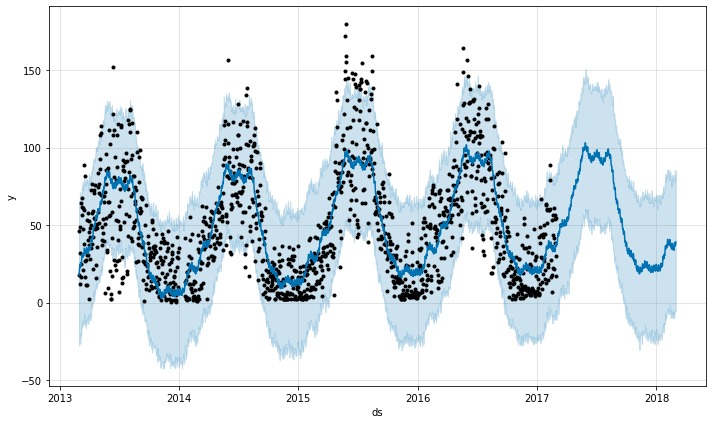

In [56]:
for station in stations.groups:
  group = stations.get_group(station)

  model = Prophet(interval_width=0.95)
  model.fit(group)
  future = model.make_future_dataframe(periods=366)
  forecast = model.predict(future)
  model.plot(forecast)
  forecast = forecast.rename(columns={'yhat':'yhat_'+station})
  target = pd.merge(target, forecast.set_index('ds'), how='outer',
                    left_index=True, right_index=True)

In [57]:
target

,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,weekly_x,weekly_lower_x,weekly_upper_x,yearly_x,yearly_lower_x,yearly_upper_x,multiplicative_terms_x,multiplicative_terms_lower_x,multiplicative_terms_upper_x,y_hat_Gucheng,trend_y,yhat_lower_y,yhat_upper_y,trend_lower_y,trend_upper_y,additive_terms_y,additive_terms_lower_y,additive_terms_upper_y,weekly_y,weekly_lower_y,weekly_upper_y,yearly_y,yearly_lower_y,yearly_upper_y,multiplicative_terms_y,multiplicative_terms_lower_y,multiplicative_terms_upper_y,y_hat_Shunyi,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,...,multiplicative_terms_y,multiplicative_terms_lower_y,multiplicative_terms_upper_y,yhat_Gucheng,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,weekly_x,weekly_lower_x,weekly_upper_x,yearly_x,yearly_lower_x,yearly_upper_x,multiplicative_terms_x,multiplicative_terms_lower_x,multiplicative_terms_upper_x,yhat_Shunyi,trend_y,yhat_lower_y,yhat_upper_y,trend_lower_y,trend_upper_y,additive_terms_y,additive_terms_lower_y,additive_terms_upper_y,weekly_y,weekly_lower_y,weekly_upper_y,yearly_y,yearly_lower_y,yearly_upper_y,multiplicative_terms_y,multiplicative_terms_lower_y,multiplicative_terms_upper_y,yhat_Wanliu
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,49.084059,-15.286525,81.437014,49.084059,49.084059,-15.179868,-15.179868,-15.179868,-1.940995,-1.940995,-1.940995,-13.238873,-13.238873,-13.238873,0.0,0.0,0.0,33.904191,51.043807,-15.060636,81.021901,51.043807,51.043807,-17.147816,-17.147816,-17.147816,-1.301577,-1.301577,-1.301577,-15.846240,-15.846240,-15.846240,0.0,0.0,0.0,33.895991,37.010620,-27.822849,61.275095,37.010620,...,0.0,0.0,0.0,33.904191,51.043807,-12.001962,81.168112,51.043807,51.043807,-17.147816,-17.147816,-17.147816,-1.301577,-1.301577,-1.301577,-15.846240,-15.846240,-15.846240,0.0,0.0,0.0,33.895991,37.010620,-27.596857,61.819962,37.010620,37.010620,-19.299212,-19.299212,-19.299212,-1.925011,-1.925011,-1.925011,-17.374201,-17.374201,-17.374201,0.0,0.0,0.0,17.711409
2013-03-02,49.099025,-8.293729,81.518144,49.099025,49.099025,-13.116501,-13.116501,-13.116501,-0.800782,-0.800782,-0.800782,-12.315719,-12.315719,-12.315719,0.0,0.0,0.0,35.982524,51.055284,-10.537061,78.203654,51.055284,51.055284,-16.824081,-16.824081,-16.824081,-1.746628,-1.746628,-1.746628,-15.077453,-15.077453,-15.077453,0.0,0.0,0.0,34.231202,37.022769,-24.678347,68.471531,37.022769,...,0.0,0.0,0.0,35.982524,51.055284,-12.963304,78.263011,51.055284,51.055284,-16.824081,-16.824081,-16.824081,-1.746628,-1.746628,-1.746628,-15.077453,-15.077453,-15.077453,0.0,0.0,0.0,34.231202,37.022769,-24.677316,65.497912,37.022769,37.022769,-16.969811,-16.969811,-16.969811,-0.469608,-0.469608,-0.469608,-16.500203,-16.500203,-16.500203,0.0,0.0,0.0,20.052958
2013-03-03,49.113990,-4.453146,84.665785,49.113990,49.113990,-9.354453,-9.354453,-9.354453,2.014621,2.014621,2.014621,-11.369073,-11.369073,-11.369073,0.0,0.0,0.0,39.759538,51.066760,-6.253762,85.420132,51.066760,51.066760,-11.674611,-11.674611,-11.674611,2.562108,2.562108,2.562108,-14.236719,-14.236719,-14.236719,0.0,0.0,0.0,39.392149,37.034918,-20.061139,67.662134,37.034918,...,0.0,0.0,0.0,39.759538,51.066760,-8.166832,83.499229,51.066760,51.066760,-11.674611,-11.674611,-11.674611,2.562108,2.562108,2.562108,-14.236719,-14.236719,-14.236719,0.0,0.0,0.0,39.392149,37.034918,-20.644180,64.806094,37.034918,37.034918,-13.157718,-13.157718,-13.157718,2.407774,2.407774,2.407774,-15.565492,-15.565492,-15.565492,0.0,0.0,0.0,23.877200
2013-03-04,49.128956,-3.285120,88.754448,49.128956,49.128956,-8.105451,-8.105451,-8.105451,2.304802,2.304802,2.304802,-10.410253,-10.410253,-10.410253,0.0,0.0,0.0,41.023505,51.078237,-10.105749,82.185889,51.078237,51.078237,-12.216837,-12.216837,-12.216837,1.122989,1.122989,1.122989,-13.339827,-13.339827,-13.339827,0.0,0.0,0.0,38.861399,

In [58]:
target = target[['yhat_'+ station for station in stations.groups.keys()]]

In [59]:
target

,yhat_Gucheng,yhat_Shunyi,yhat_Wanliu
ds,,,
2013-03-01,33.904191,33.895991,17.711409
2013-03-02,35.982524,34.231202,20.052958
2013-03-03,39.759538,39.392149,23.877200
2013-03-04,41.023505,38.861399,24.392543
2013-03-05,38.407914,38.510811,22.542686
...,...,...,...
2018-02-25,30.655595,42.999478,38.722104
2018-02-26,31.638301,41.894387,38.733790
2018-02-27,28.803092,41.047648,36.456615


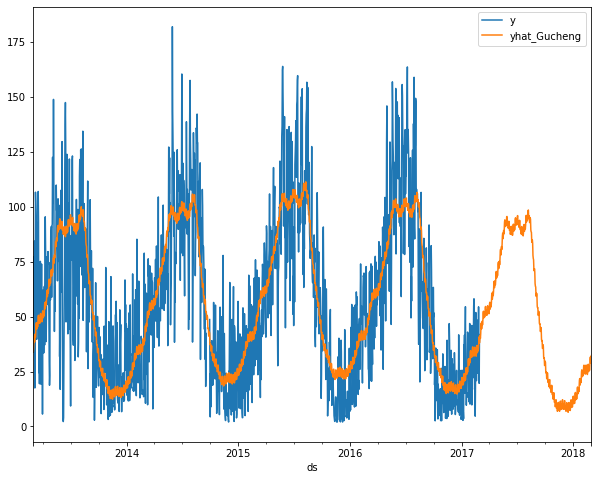

In [60]:
pd.concat([aq_df_final.set_index('ds').query("station=='Gucheng'")['y'], target['yhat_Gucheng']], axis=1).plot()

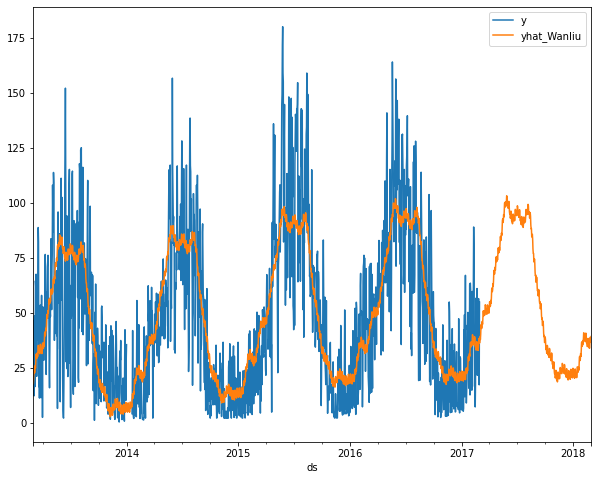

In [62]:
pd.concat([aq_df_final.set_index('ds').query("station=='Wanliu'")['y'], target['yhat_Wanliu']], axis=1).plot()